In [1]:
# House Prices Data
# 79 features describing various aspects of residential homes in Ames, Iowa
# Predict house prices
# Evaluation: Root mean square error
# https://www.kaggle.com/c/house-prices-advanced-regression-techniques#description

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading data
raw_data = pd.read_csv('house_prices.csv')

In [3]:
raw_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
raw_data = raw_data[['LotFrontage','LotArea','Street','Alley', 'LotShape', 'Utilities','Neighborhood','BldgType','HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Heating', 'Electrical', 'KitchenAbvGr', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']]

In [5]:
raw_data[:10]

,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Heating,Electrical,KitchenAbvGr,YrSold,SaleType,SaleCondition,SalePrice
0,65.0,8450,Pave,NaN,Reg,AllPub,CollgCr,1Fam,2Story,7,5,2003,2003,GasA,SBrkr,1,2008,WD,Normal,208500
1,80.0,9600,Pave,NaN,Reg,AllPub,Veenker,1Fam,1Story,6,8,1976,1976,GasA,SBrkr,1,2007,WD,Normal,181500
2,68.0,11250,Pave,NaN,IR1,AllPub,CollgCr,1Fam,2Story,7,5,2001,2002,GasA,SBrkr,1,2008,WD,Normal,223500
3,60.0,9550,Pave,NaN,IR1,AllPub,Crawfor,1Fam,2Story,7,5,1915,1970,GasA,SBrkr,1,2006,WD,Abnorml,140000
4,84.0,14260,Pave,NaN,IR1,AllPub,NoRidge,1Fam,2Story,8,5,2000,2000,GasA,SBrkr,1,2008,WD,Normal,250000
5,85.0,14115,Pave,NaN,IR1,AllPub,Mitchel,1Fam,1.5Fin,5,5,1993,1995,GasA,SBrkr,1,2009,WD,Normal,143000
6,75.0,10084,Pave,NaN,Reg,AllPub,Somerst,1Fam,1Story,8,5,2004,2005,GasA,SBrkr,1,2007,WD,Normal,307000
7,NaN,10382,Pave,NaN,IR1,AllPub,NWAmes,1Fam,2Story,7,6,1973,1973,GasA,SBrkr,1,2009,WD,Normal,200000
8,51.0,6120,Pave,NaN,Reg,AllPub,OldTown,1Fam,1.5Fin,7,5,1931,1950,GasA,FuseF,2,2008,WD,Abnorml,129900
9,50.0,7420,Pave,NaN,Reg,AllPub,BrkSide,2fmCon,1.5Unf,5,6,1939,1950,GasA,SBrkr,2,2008,WD,Normal,118000


In [6]:
# Missing Values
raw_data['LotFrontage']

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
5        85.0
6        75.0
7         NaN
8        51.0
9        50.0
10       70.0
11       85.0
12        NaN
13       91.0
14        NaN
15       51.0
16        NaN
17       72.0
18       66.0
19       70.0
20      101.0
21       57.0
22       75.0
23       44.0
24        NaN
25      110.0
26       60.0
27       98.0
28       47.0
29       60.0
        ...  
1430     60.0
1431      NaN
1432     60.0
1433     93.0
1434     80.0
1435     80.0
1436     60.0
1437     96.0
1438     90.0
1439     80.0
1440     79.0
1441      NaN
1442     85.0
1443      NaN
1444     63.0
1445     70.0
1446      NaN
1447     80.0
1448     70.0
1449     21.0
1450     60.0
1451     78.0
1452     35.0
1453     90.0
1454     62.0
1455     62.0
1456     85.0
1457     66.0
1458     68.0
1459     75.0
Name: LotFrontage, dtype: float64

In [7]:
# Check missing values in rows
raw_data.isnull().sum(axis=1).max()
# raw_data.isnull().sum(axis=1).max()

2

In [8]:
raw_data.isnull().sum()

LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
Utilities           0
Neighborhood        0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
Heating             0
Electrical          1
KitchenAbvGr        0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

In [9]:
# Missing Frontage - delete rows
processed_data = raw_data[raw_data['LotFrontage'].isnull() == False]

In [10]:
processed_data

,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Heating,Electrical,KitchenAbvGr,YrSold,SaleType,SaleCondition,SalePrice
0,65.0,8450,Pave,NaN,Reg,AllPub,CollgCr,1Fam,2Story,7,5,2003,2003,GasA,SBrkr,1,2008,WD,Normal,208500
1,80.0,9600,Pave,NaN,Reg,AllPub,Veenker,1Fam,1Story,6,8,1976,1976,GasA,SBrkr,1,2007,WD,Normal,181500
2,68.0,11250,Pave,NaN,IR1,AllPub,CollgCr,1Fam,2Story,7,5,2001,2002,GasA,SBrkr,1,2008,WD,Normal,223500
3,60.0,9550,Pave,NaN,IR1,AllPub,Crawfor,1Fam,2Story,7,5,1915,1970,GasA,SBrkr,1,2006,WD,Abnorml,140000
4,84.0,14260,Pave,NaN,IR1,AllPub,NoRidge,1Fam,2Story,8,5,2000,2000,GasA,SBrkr,1,2008,WD,Normal,250000
5,85.0,14115,Pave,NaN,IR1,AllPub,Mitchel,1Fam,1.5Fin,5,5,1993,1995,GasA,SBrkr,1,2009,WD,Normal,143000
6,75.0,10084,Pave,NaN,Reg,AllPub,Somerst,1Fam,1Story,8,5,2004,2005,GasA,SBrkr,1,2007,WD,Normal,307000
8,51.0,6120,Pave,NaN,Reg,AllPub,OldTown,1Fam,1.5Fin,7,5,1931,1950,GasA,FuseF,2,2008,WD,Abnorml,129900
9,50.0,7420,Pave,NaN,Reg,AllPub,BrkSide,2fmCon,1.5Unf,5,6,1939,1950,GasA,SBrkr,2,2008,WD,Normal,118000
10,70.0,11200,Pave,NaN,Reg,AllPub,Sawyer,1Fam,1Story,5,5,1965,1965,GasA,SBrkr,1,2008,WD,Normal,129500


In [11]:
# Can we do better?
raw_data[raw_data['LotFrontage'].isnull() == True]
# Other option: Delete column ?

,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Heating,Electrical,KitchenAbvGr,YrSold,SaleType,SaleCondition,SalePrice
7,NaN,10382,Pave,NaN,IR1,AllPub,NWAmes,1Fam,2Story,7,6,1973,1973,GasA,SBrkr,1,2009,WD,Normal,200000
12,NaN,12968,Pave,NaN,IR2,AllPub,Sawyer,1Fam,1Story,5,6,1962,1962,GasA,SBrkr,1,2008,WD,Normal,144000
14,NaN,10920,Pave,NaN,IR1,AllPub,NAmes,1Fam,1Story,6,5,1960,1960,GasA,SBrkr,1,2008,WD,Normal,157000
16,NaN,11241,Pave,NaN,IR1,AllPub,NAmes,1Fam,1Story,6,7,1970,1970,GasA,SBrkr,1,2010,WD,Normal,149000
24,NaN,8246,Pave,NaN,IR1,AllPub,Sawyer,1Fam,1Story,5,8,1968,2001,GasA,SBrkr,1,2010,WD,Normal,154000
31,NaN,8544,Pave,NaN,IR1,AllPub,Sawyer,1Fam,1Story,5,6,1966,2006,GasA,SBrkr,1,2008,WD,Normal,149350
42,NaN,9180,Pave,NaN,IR1,AllPub,SawyerW,1Fam,SFoyer,5,7,1983,1983,GasA,SBrkr,1,2007,WD,Normal,144000
43,NaN,9200,Pave,NaN,IR1,AllPub,CollgCr,1Fam,1Story,5,6,1975,1980,GasA,SBrkr,1,2008,WD,Normal,130250
50,NaN,13869,Pave,NaN,IR2,AllPub,Gilbert,1Fam,2Story,6,6,1997,1997,GasA,SBrkr,1,2007,WD,Normal,177000
64,NaN,9375,Pave,NaN,Reg,AllPub,CollgCr,1Fam,2Story,7,5,1997,1998,GasA,SBrkr,1,2009,WD,Normal,219500


In [12]:
# Fill missing value
processed_data = raw_data.copy()
avg_lf = processed_data[processed_data['LotFrontage'].notnull()]['LotFrontage'].mean()
processed_data['LotFrontage'] = processed_data['LotFrontage'].fillna(avg_lf)

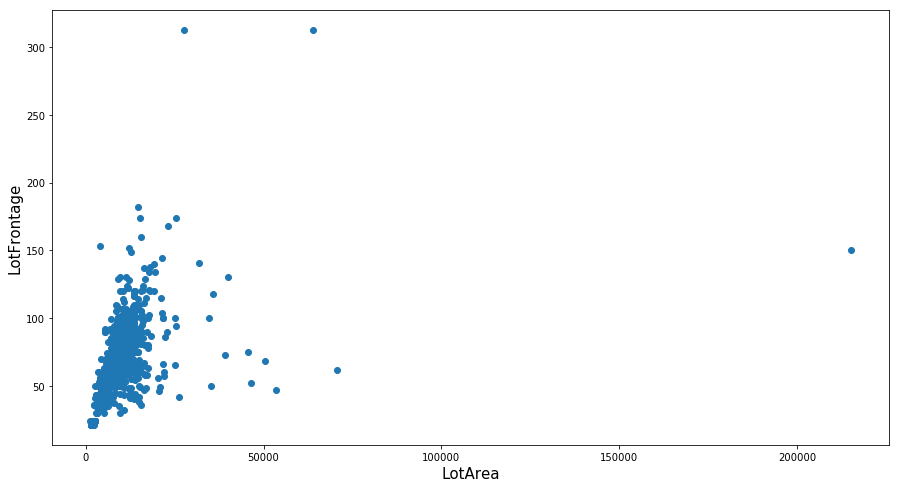

In [13]:
# Can we do better?
plt.figure(figsize=(15,8))
plt.xlabel('LotArea', fontsize=15)
plt.ylabel('LotFrontage', fontsize=15)
plt.scatter(raw_data['LotArea'], raw_data['LotFrontage'])

In [14]:
# Interpolate values
processed_data = raw_data.copy()
front_by_area = raw_data['LotFrontage']/raw_data['LotArea']
ratio_mean = front_by_area.mean()
estimates = processed_data[processed_data['LotFrontage'].isnull()]['LotArea']*ratio_mean
# processed_data.loc[processed_data['LotFrontage'].isnull()]['LotFrontage'] = estimates
processed_data['LotFrontage'] = processed_data['LotFrontage'].fillna(estimates)
# why this can be a bad idea. Use regressing/Probability distribution over multiple variables.

In [15]:
# Nearest Neighbor
from sklearn.neighbors import NearestNeighbors

processed_data = raw_data.copy()
nn_train = processed_data[processed_data['LotFrontage'].notnull()][['LotFrontage', 'LotArea']]
nn_test = processed_data[processed_data['LotFrontage'].isnull()][['LotFrontage', 'LotArea']]

model = NearestNeighbors(n_neighbors=1).fit(nn_train[['LotArea']])
distances, indices = model.kneighbors(nn_test[['LotArea']])
indices = [val[0] for val in indices]

estimates = nn_train.iloc[indices]['LotFrontage'].values
processed_data.loc[processed_data['LotFrontage'].isnull(),'LotFrontage'] = estimates

In [16]:
processed_data

,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Heating,Electrical,KitchenAbvGr,YrSold,SaleType,SaleCondition,SalePrice
0,65.0,8450,Pave,NaN,Reg,AllPub,CollgCr,1Fam,2Story,7,5,2003,2003,GasA,SBrkr,1,2008,WD,Normal,208500
1,80.0,9600,Pave,NaN,Reg,AllPub,Veenker,1Fam,1Story,6,8,1976,1976,GasA,SBrkr,1,2007,WD,Normal,181500
2,68.0,11250,Pave,NaN,IR1,AllPub,CollgCr,1Fam,2Story,7,5,2001,2002,GasA,SBrkr,1,2008,WD,Normal,223500
3,60.0,9550,Pave,NaN,IR1,AllPub,Crawfor,1Fam,2Story,7,5,1915,1970,GasA,SBrkr,1,2006,WD,Abnorml,140000
4,84.0,14260,Pave,NaN,IR1,AllPub,NoRidge,1Fam,2Story,8,5,2000,2000,GasA,SBrkr,1,2008,WD,Normal,250000
5,85.0,14115,Pave,NaN,IR1,AllPub,Mitchel,1Fam,1.5Fin,5,5,1993,1995,GasA,SBrkr,1,2009,WD,Normal,143000
6,75.0,10084,Pave,NaN,Reg,AllPub,Somerst,1Fam,1Story,8,5,2004,2005,GasA,SBrkr,1,2007,WD,Normal,307000
7,75.0,10382,Pave,NaN,IR1,AllPub,NWAmes,1Fam,2Story,7,6,1973,1973,GasA,SBrkr,1,2009,WD,Normal,200000
8,51.0,6120,Pave,NaN,Reg,AllPub,OldTown,1Fam,1.5Fin,7,5,1931,1950,GasA,FuseF,2,2008,WD,Abnorml,129900
9,50.0,7420,Pave,NaN,Reg,AllPub,BrkSide,2fmCon,1.5Unf,5,6,1939,1950,GasA,SBrkr,2,2008,WD,Normal,118000


In [17]:
#processed_data
processed_data['Alley']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17       NaN
18       NaN
19       NaN
20       NaN
21      Grvl
22       NaN
23       NaN
24       NaN
25       NaN
26       NaN
27       NaN
28       NaN
29       NaN
        ... 
1430     NaN
1431     NaN
1432    Grvl
1433     NaN
1434     NaN
1435     NaN
1436     NaN
1437     NaN
1438     NaN
1439     NaN
1440     NaN
1441     NaN
1442     NaN
1443     NaN
1444     NaN
1445     NaN
1446     NaN
1447     NaN
1448     NaN
1449     NaN
1450     NaN
1451     NaN
1452     NaN
1453     NaN
1454    Pave
1455     NaN
1456     NaN
1457     NaN
1458     NaN
1459     NaN
Name: Alley, dtype: object

In [18]:
# Delete feature
del processed_data['Alley']

In [19]:
processed_data['Electrical']
# processed_data[processed_data['Electrical'].isnull()]

0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
5       SBrkr
6       SBrkr
7       SBrkr
8       FuseF
9       SBrkr
10      SBrkr
11      SBrkr
12      SBrkr
13      SBrkr
14      SBrkr
15      FuseA
16      SBrkr
17      SBrkr
18      SBrkr
19      SBrkr
20      SBrkr
21      FuseF
22      SBrkr
23      SBrkr
24      SBrkr
25      SBrkr
26      SBrkr
27      SBrkr
28      SBrkr
29      SBrkr
        ...  
1430    SBrkr
1431    SBrkr
1432    SBrkr
1433    SBrkr
1434    SBrkr
1435    SBrkr
1436    SBrkr
1437    SBrkr
1438    FuseA
1439    SBrkr
1440    SBrkr
1441    SBrkr
1442    SBrkr
1443    FuseF
1444    SBrkr
1445    SBrkr
1446    SBrkr
1447    SBrkr
1448    SBrkr
1449    SBrkr
1450    SBrkr
1451    SBrkr
1452    SBrkr
1453    SBrkr
1454    SBrkr
1455    SBrkr
1456    SBrkr
1457    SBrkr
1458    FuseA
1459    SBrkr
Name: Electrical, dtype: object

In [20]:
# Fill mode
mode = processed_data['Electrical'].mode()[0]
processed_data['Electrical'] = processed_data['Electrical'].fillna(mode)

In [21]:
processed_data.isnull().sum()

LotFrontage      0
LotArea          0
Street           0
LotShape         0
Utilities        0
Neighborhood     0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
Heating          0
Electrical       0
KitchenAbvGr     0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

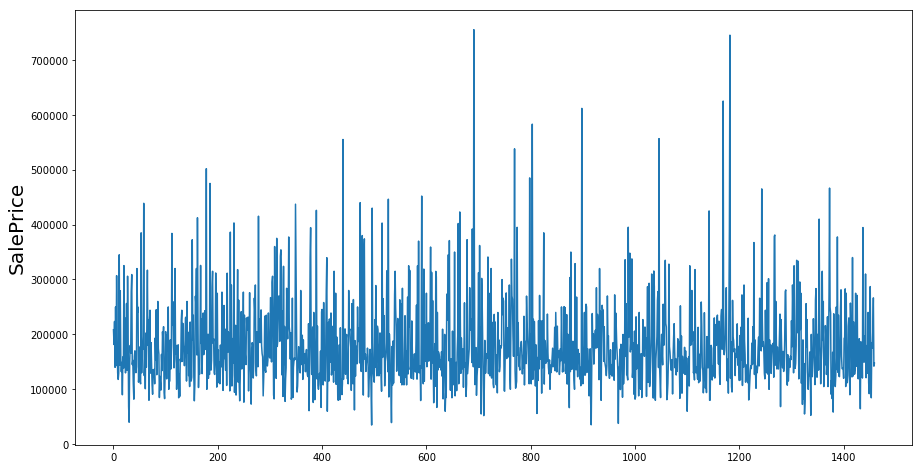

In [22]:
# Visualize Sale Price
plt.figure(figsize=(15,8))
plt.ylabel('SalePrice', fontsize=20)
plt.xlabel('Data samples', fontsize=20)
plt.plot(processed_data['SalePrice'])

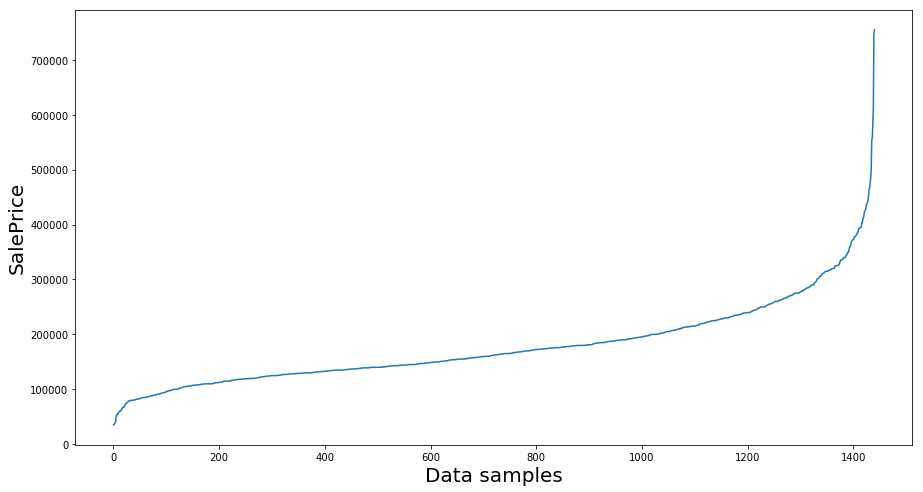

In [29]:
# Better Visualization
plt.figure(figsize=(15,8))
plt.ylabel('SalePrice', fontsize=20)
plt.xlabel('Data samples', fontsize=20)
sorted_price = np.sort(processed_data['SalePrice'])
plt.plot(sorted_price)

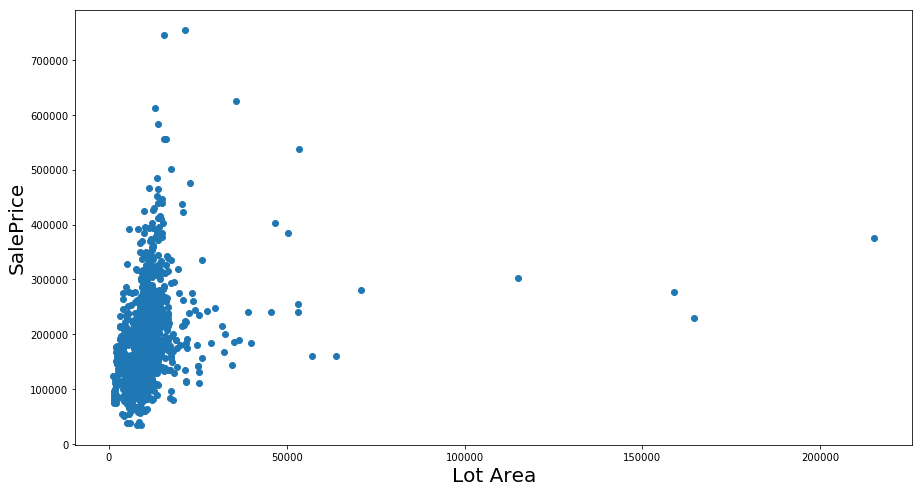

In [24]:
# More visualizations
plt.figure(figsize=(15,8))
plt.xlabel('Lot Area', fontsize=20)
plt.ylabel('SalePrice', fontsize=20)
plt.scatter(processed_data['LotArea'], processed_data['SalePrice'])

In [25]:
#Removing outliers add prob. meth.
processed_data = processed_data[processed_data['LotArea'] < 100000]

In [26]:
#Removing outliers prability distribution
mean = processed_data['LotArea'].mean()
std = processed_data['LotArea'].std()
processed_data = processed_data[processed_data['LotArea'].between(mean-4*std,mean+4*std)]

In [30]:
#Removing non-predictive features
print(processed_data.groupby(['Utilities'])['Utilities'].count())
processed_data[processed_data['Utilities'] == 'NoSeWa']
# very few cases to train
del processed_data['Utilities']

Utilities
AllPub    1440
NoSeWa       1
Name: Utilities, dtype: int64


<Container object of 10 artists>

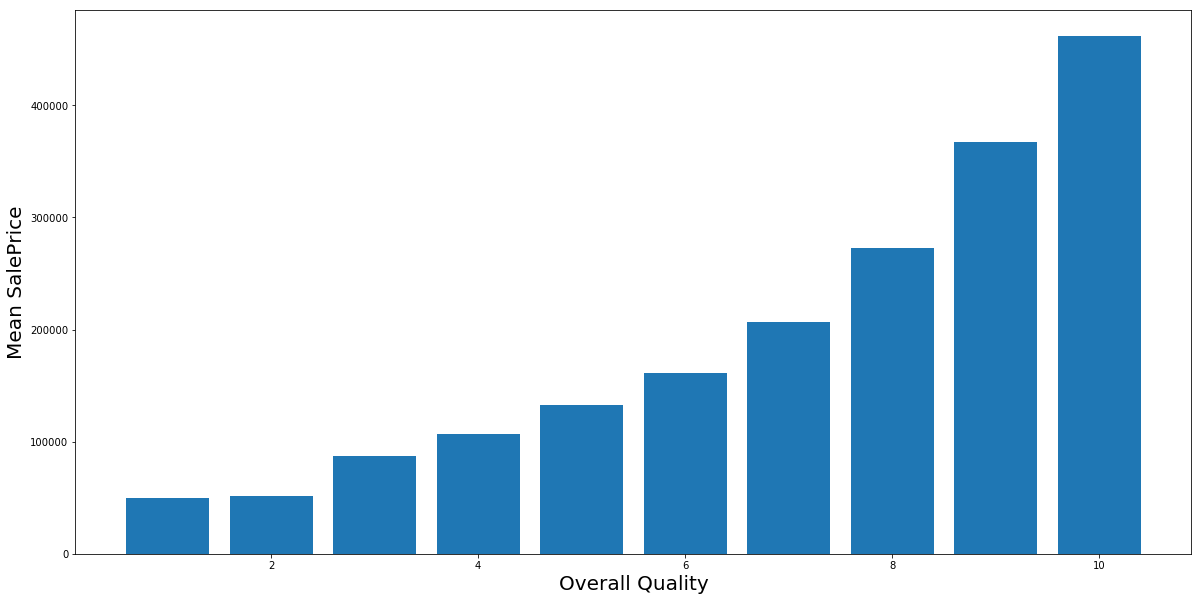

In [31]:
# Exploratory Analysis
plt.figure(figsize=(20,10))
plt.ylabel('Mean SalePrice', fontsize=20)
plt.xlabel('Overall Quality', fontsize=20)
qlty_grps = processed_data.groupby(['OverallQual'])['SalePrice'].mean()
plt.bar( qlty_grps.index, qlty_grps.values, align='center')

<Container object of 9 artists>

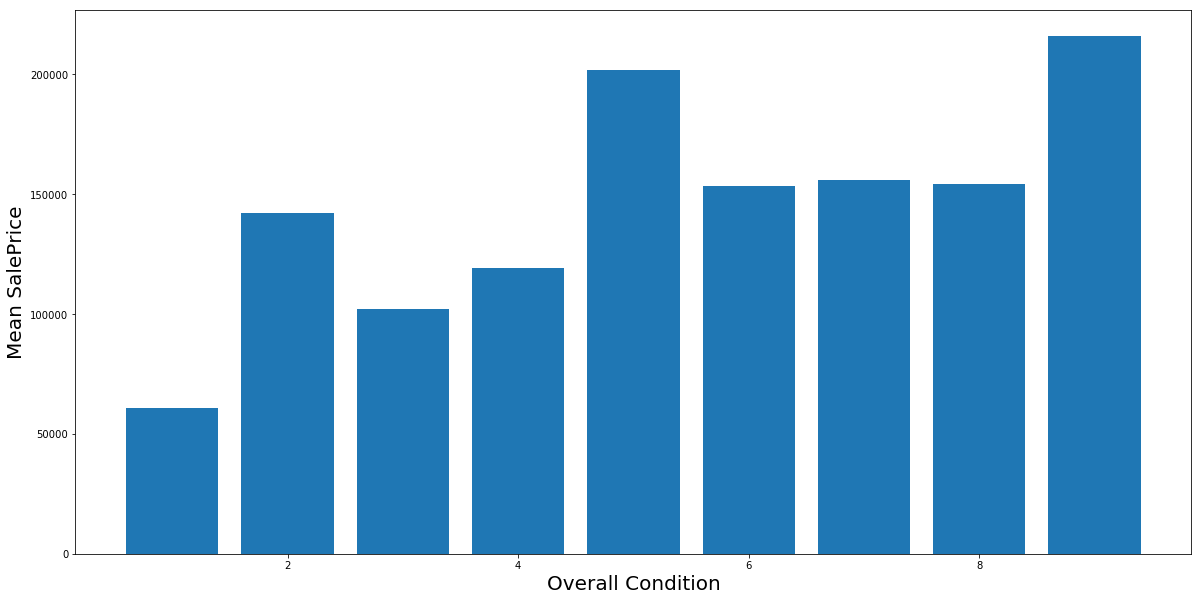

In [32]:
plt.figure(figsize=(20,10))
plt.ylabel('Mean SalePrice', fontsize=20)
plt.xlabel('Overall Condition', fontsize=20)
cdtn_grps = processed_data.groupby(['OverallCond'])['SalePrice'].mean()
plt.bar( cdtn_grps.index, cdtn_grps.values, align='center')

([<matplotlib.axis.XTick at 0x114aeca58>,
 <a list of 4 Text xticklabel objects>)

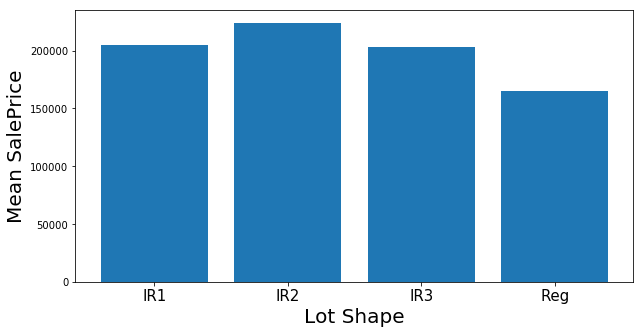

In [33]:
plt.figure(figsize=(10,5))
plt.ylabel('Mean SalePrice', fontsize=20)
plt.xlabel('Lot Shape', fontsize=20)
shape_grps = processed_data.groupby(['LotShape'])['SalePrice'].mean()
plt.bar( range(len(shape_grps)), shape_grps.values, align='center')
plt.xticks(range(len(shape_grps)), shape_grps.index, size=15)

In [34]:
#One hot encoding
processed_data['Street'].nunique()
# pd.get_dummies(processed_data['Street'])

2

In [35]:
processed_data = pd.concat([processed_data, pd.get_dummies(processed_data['Street'])], axis=1)

In [36]:
processed_data

,LotFrontage,LotArea,Street,LotShape,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Heating,Electrical,KitchenAbvGr,YrSold,SaleType,SaleCondition,SalePrice,Grvl,Pave
0,65.0,8450,Pave,Reg,CollgCr,1Fam,2Story,7,5,2003,2003,GasA,SBrkr,1,2008,WD,Normal,208500,0,1
1,80.0,9600,Pave,Reg,Veenker,1Fam,1Story,6,8,1976,1976,GasA,SBrkr,1,2007,WD,Normal,181500,0,1
2,68.0,11250,Pave,IR1,CollgCr,1Fam,2Story,7,5,2001,2002,GasA,SBrkr,1,2008,WD,Normal,223500,0,1
3,60.0,9550,Pave,IR1,Crawfor,1Fam,2Story,7,5,1915,1970,GasA,SBrkr,1,2006,WD,Abnorml,140000,0,1
4,84.0,14260,Pave,IR1,NoRidge,1Fam,2Story,8,5,2000,2000,GasA,SBrkr,1,2008,WD,Normal,250000,0,1
5,85.0,14115,Pave,IR1,Mitchel,1Fam,1.5Fin,5,5,1993,1995,GasA,SBrkr,1,2009,WD,Normal,143000,0,1
6,75.0,10084,Pave,Reg,Somerst,1Fam,1Story,8,5,2004,2005,GasA,SBrkr,1,2007,WD,Normal,307000,0,1
7,75.0,10382,Pave,IR1,NWAmes,1Fam,2Story,7,6,1973,1973,GasA,SBrkr,1,2009,WD,Normal,200000,0,1
8,51.0,6120,Pave,Reg,OldTown,1Fam,1.5Fin,7,5,1931,1950,GasA,FuseF,2,2008,WD,Abnorml,129900,0,1
9,50.0,7420,Pave,Reg,BrkSide,2fmCon,1.5Unf,5,6,1939,1950,GasA,SBrkr,2,2008,WD,Normal,118000,0,1


In [ ]:
# Practice Question
# 1. Download the wine dataset (wine_modified.csv) from github
# 2. Load the wine data in ipython notebook
# 3. Clean the data and deal with the missing values (Multiple correct ways to do this)
# 4. Compute mean and standard deviation of attributes in processed data
# 5. Download the original wine dataset (wine_original.csv) from github and 
#    compare the mean/standard deviation in step 4 with that of the original dataset
# 6. Perform relevant visualizations (You can use scatter() to create plots and 
#    give different colors for different classes)



In [ ]:
# Data Description
# 1. Multiclass classification problem with 3 classes: {1,2,3} representing 3 different cultivators
# 2. 13 continuous attributes
# 3. UCI Machine Learning Repository